In [2]:
import csv
import pandas as pd
from datetime import datetime
import os
import subprocess
import matplotlib.pyplot as plt


In [32]:
dir_list = os.listdir(".//csv")
print(dir_list)
for i in dir_list:
    df = pd.read_csv(".//csv//"+i, encoding="utf-8")
    print(df.iloc[0,0])

['ATM裝設臺數.csv', '企業放款_放款總額.csv', '信用卡逾期帳款比率.csv', '個人放款_放款總額.csv', '備抵呆帳覆蓋率.csv', '利息收入.csv', '利息淨收益_總收入.csv', '存放比率.csv', '存款與權益比率.csv', '手續費收入.csv', '普通股權益比率(季).csv', '權益報酬率.csv', '活卡率.csv', '流通金融卡數.csv', '負債權益比.csv', '資本適足率(季).csv', '資產報酬率.csv', '逾期放款.csv', '逾期放款比率.csv', '金融卡交易次數.csv', '電子支付使用者人數.csv', '電子支付支付款項餘額.csv', '電子支付當月代理收付實質款項交易金額.csv']
2017年1月
2017年1月
2017年1月
2017年1月
2018年1月
2017年1月
2017年1月
2017年1月
2017年1月
2017年1月
2022年Q4
2017年1月
2017年1月
2017年1月
2017年1月
2022年Q4
2017年1月
2018年1月
2018年1月
2017年1月
2018年4月
2018年4月
2018年4月


In [31]:
df = pd.read_csv(".//csv//手續費收入.csv", encoding="utf-8")
share = df["玉山商業銀行-市佔率"] 

month = df.iloc[:,0]
print(month)

0      2017年1月
1      2017年2月
2      2017年3月
3      2017年4月
4      2017年5月
        ...   
67     2022年8月
68     2022年9月
69    2022年10月
70    2022年11月
71    2022年12月
Name: Unnamed: 0, Length: 72, dtype: object


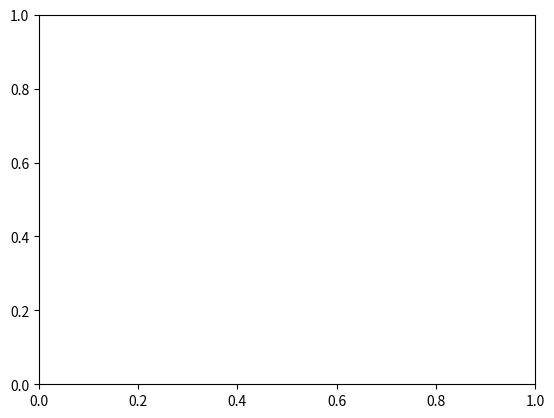

In [28]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

df = pd.read_csv(r"D:\Python\EsunGroupA\csv\手續費收入.csv", encoding="utf-8")

banks = ["中國信託商業銀行","台北富邦商業銀行","國泰世華商業銀行","合作金庫銀行","兆豐國際商業銀行","第一商業銀行","臺灣銀行","玉山商業銀行"]

data_list = []           

#取得資料
for i in range(len(banks)):
    data_list[i] = df[banks[i]]

# list1 = df["中國信託商業銀行"] # market share
# list2 = df["台北富邦商業銀行"]   # market ranking
# list3 = df["國泰世華商業銀行"]
# list4 = df["合作金庫銀行"]
# list5 = df["兆豐國際商業銀行"]
# list6 = df["第一商業銀行"]
# list7 = df["臺灣銀行"]
# list8 = df["玉山商業銀行"]

#取得月份
month = df.iloc[:,0]

# 把月份格式更改, 例:2022年01月 -> 2022/01
new_month = []
for m in month:
    dt = datetime.strptime(m, '%Y年%m月')
    new_month.append(dt.strftime('%Y/%m'))

# Create the plot
fig, ax = plt.subplots()

fig, ax = plt.subplots(figsize=(16, 9))

# Plot the first dataset (share) on the left y-axis
ax.plot(list1, color='red', label="中國信託商業銀行")
ax.plot(list2, color='blue', label="台北富邦商業銀行")
ax.plot(list3, color='orange', label="國泰世華商業銀行")
ax.plot(list4, color='yellow', label="合作金庫銀行")
ax.plot(list5, color='green', label="兆豐國際商業銀行")
ax.plot(list6, color='black', label="第一商業銀行")
ax.plot(list7, color='purple', label="臺灣銀行")
ax.plot(list8, color='pink', label="玉山商業銀行")

# Set the x-tick positions and labels
plt.xticks(range(0, len(month), 3), [new_month[i] for i in range(0, len(new_month), 3)])
# xticks = range(len(new_month))
# plt.xticks(xticks, new_month)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# # Add data labels to the plot
# for x, y1, y2 in zip(xticks, share, rank):
#     ax1.text(x, y1, f'{y1:.2f}', ha='center', va='bottom')
#     ax2.text(x, y2, f'{y2:.0f}', ha='center', va='bottom')

# 幫圖加上標題
plt.title("手續費收入")     

# Add a legend to the plot
ax.legend()

# create folder if it does not exist
directory = ".//graph"

if not os.path.exists(directory):
    os.makedirs(directory)

# Save the plot
name = "手續費收入" + '.png'
plt.savefig(os.path.join(".//graph//", name))
plt.close()